In [1]:
import re,os
import numpy as np
from eval import eval
from utils.evaluate import evaluate
from utils.data_load import load_data,filter,read_area_num,plt_sq,read_num,diff


In [2]:
class data_sq:
    def __init__(self):
        self.sq_num = None
        self.name = None
data = load_data()
data_track = filter(data[0])
data_top =data[1]
area_num = []
area_1 = [(1059,222),(1410,591)]
area_3 = [(1600,135),(1860,597)]
area_3 = [(1600,145),(1837,511)]
#area_3 = [(1600,83),(1838,456)]
area = area_1
with open('result/detect/1.txt','r') as f:
    lines = f.read()
f.close()
a=lines.split('frame')
a=a[1:]
area_num.append(read_area_num(a,area))
with open('result/detect/2.txt','r') as f:
    lines = f.read()
f.close()
a=lines.split('frame')
a=a[1:]
area_num.append(read_area_num(a,area))
area = area_3
with open('result/detect/3.txt','r') as f:
    lines = f.read()
f.close()
a=lines.split('frame')
a=a[1:]
area_num.append(read_area_num(a,area))

In [3]:
for i in range(len(area_num)):

    data_track[i+1].area_num=area_num[i]

In [11]:

def joint_tr(data_track,data_top):
    frame_track = data_track.frame.copy()
    frame_top = data_top.frame.copy()
    area_num = data_track.area_num.copy()
    num_track = data_track.num.copy()
    num_top = data_top.num.copy()
    joint_frame = []
    joint_num = []
    no_confirm=[]
    for i in frame_track:
        if area_num[i-1]==0:
            no_confirm.append(i)


    for i in range(len(frame_top)):
        frame = [i for i in [frame_top[i], frame_top[i] - 1, frame_top[i] + 1] if i in frame_track]

        if len(frame)>0:
            index_ = frame_track.index(frame[0])
 

            if area_num[frame[0]-1]<3:


                    
                if abs(num_top[i])>abs(num_track[index_]) & (num_top[i]*num_track[index_]>0):

                    if (frame[0]-frame_track[index_-1]<4):


                        num_track[index_]=num_top[i]-num_track[index_]

                    else:

                        num_track[index_]=num_top[i]
                elif num_top[i]*num_track[index_]<0:
                    

                    if area_num[frame[0]-2]-area_num[frame[0]-1]>0:
                        num_track[index_] = max(num_track[index_],num_top[i])
                        print(num_track[index_])
                    else:
                        num_track[index_] = min(num_track[index_],num_top[i])
                        print(num_track[index_])
                        
 
                joint_frame.append(frame[0])
                joint_num.append(num_track[index_])

                del frame_track[index_]
                del num_track[index_]

        elif area_num[frame_top[i]-1]>0:
            


            joint_frame.append(frame_top[i])
            joint_num.append(num_top[i])
        
    for i in frame_track:
        if area_num[i-1]<3:
            joint_frame.append(i)
            joint_num.append(num_track[frame_track.index(i)])
    frame_ = np.array(joint_frame)
    num = np.array(joint_num)
    index = frame_.argsort()
    frame_ = frame_[index]
    num = num[index]
    return frame_, num

a,b = joint_tr(data_track[3],data_top[3])


In [5]:
stat = [0,3,3,11]
data_pre = {}
frame_num = [796,917,837]
for i in data_track.keys():
    log = []
    dir_ = str(i)+'.txt'
    #a = data_top[i].frame
    #b = data_top[i].num
    a,b = joint_tr(data_track[i],data_top[i])
    data_pre[i]= diff()
    data_pre[i].frame = a
    data_pre[i].num =b
    num = frame_num[i-1]
    
 
    lab = np.zeros(num)
    
    sta = stat[i]
    lab[0 :a[0]] = sta
    for i in range(len(a)-1):
        sta+=b[i]
        lab[a[i]-1:a[i+1]] =sta
    lab[a[i+1] :num] = sta+b[i+1]
    for i in range(len((lab))):
        text = 'frame: {}, num: {}'.format(i, int(lab[i]))
        log.append(text + '\n')
    with open(('result/joint_top/'+dir_), 'w+') as f:
        f.writelines(log)
eval('result/joint_top/1.txt','gt/1.txt')
eval('result/track_top/1.txt','gt/1.txt')
eval('result/joint_top/2.txt','gt/2.txt')
eval('result/track_top/2.txt','gt/2.txt')
eval('result/joint_top/3.txt','gt/3.txt')
eval('result/track_top/3.txt','gt/3.txt')

视频:  1 NMAE:  0.001 score:  0.992
视频:  1 NMAE:  0.263 score:  0.046
视频:  2 NMAE:  0.075 score:  0.297
视频:  2 NMAE:  0.071 score:  0.593
视频:  3 NMAE:  0.018 score:  0.637
视频:  3 NMAE:  0.152 score:  0.13


(0.152, 0.13)

In [6]:
stat = [0,3,3,11]
data_pre = {}
frame_num = [796,917,837]
for i in data_track.keys():
    log = []
    dir_ = str(i)+'.txt'
    #a = data_top[i].frame
    #b = data_top[i].num
    a,b = joint_tr(data_track[i],data_top[i])
    data_pre[i]= diff()
    data_pre[i].frame = a
    data_pre[i].num =b
    num = frame_num[i-1]
    
 
    lab = np.zeros(num)
    
    sta = stat[i]
    lab[0 :a[0]] = sta
    for i in range(len(a)-1):
        sta+=b[i]
        lab[a[i]-1:a[i+1]] =sta
    lab[a[i+1] :num] = sta+b[i+1]
    for i in range(len((lab))):
        text = 'frame: {}, num: {}'.format(i, int(lab[i]))
        log.append(text + '\n')
    with open(('result/joint_top/'+dir_), 'w+') as f:
        f.writelines(log)

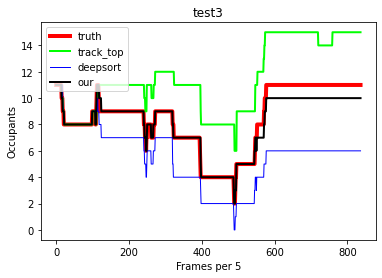

In [7]:
sq_data={}
dir_= '3.txt'
sq_data[1] = data_sq()
sq_data[1].sq_num = read_num(os.path.join('gt',dir_))
sq_data[1].name = 'truth'
sq_data[2] = data_sq()
sq_data[2].sq_num = read_num(os.path.join('result/track_top',dir_))
sq_data[2].name = 'track_top'
sq_data[3] = data_sq()
sq_data[3].sq_num = read_num(os.path.join('result/deepsort',dir_))
sq_data[3].name = 'deepsort'
sq_data[4] = data_sq()
sq_data[4].sq_num = read_num(os.path.join('result/joint_top',dir_))
sq_data[4].name = 'our'
plt_sq(sq_data,title ='test3')

In [8]:
lab31 = [1,16,19,22,100,109,111,112,113,118,119,242,245,248,249,251,262,268,272,322,324,396,397,398,489,490,493,494,496,546,547,553,572,574,577]
lab32 = [11,10,9,8,9,8,9,10,11,10,9,8,7,6,7,8,7,8,9,8,7,6,5,4,3,2,3,4,5,6,7,8,9,10,11]
a,b = joint_tr(data_track[3],data_top[3])
for i in range(len(a)):
    print(a[i],b[i])

16 -1
19 -1
23 -1
100 1
109 -1
111 1
112 1
113 1
119 -1
125 -1
242 -1
244 -1
248 -1
250 1
251 1
262 -1
268 1
273 1
321 -1
323 -1
398 -2
399 -1
489 -1
490 -1
493 1
496 2
546 1
548 1
551 -1
552 1
572 1
574 1
577 1


In [9]:
for i in range(len(data_track[3].frame)):
    print(data_track[3].frame[i],data_track[3].num[i])
for i in range(len(data_top[3].frame)):
    print(data_top[3].frame[i],data_top[3].num[i])

19 -1
20 -1
23 -1
100 1
109 -1
111 1
115 1
116 -1
119 -1
125 -1
242 -1
244 -1
248 -1
250 1
251 1
262 -1
268 1
273 1
321 -2
323 -1
398 -1
399 -1
489 -1
490 -1
493 1
496 1
546 1
548 1
551 -1
552 1
572 1
577 1
16 -1
19 -1
22 -1
100 1
109 -1
111 1
112 1
113 1
242 -1
245 -1
251 2
262 -1
269 1
273 1
321 -1
397 -2
398 -1
490 -2
496 3
548 2
553 1
572 1
574 1
577 1
720 -1
759 1


In [10]:
area_num[2][550]

1

In [11]:
# import cv2
# path = "/home/liup/Document/code/test/result/track/3.mp4"
# save_path = "/home/liup/Document/code/test/result/track/31.mp4"
# cap = cv2.VideoCapture(path)
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float
# fps = cap.get(cv2.CAP_PROP_FPS)
# vid_writer = cv2.VideoWriter(
#     save_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (int(width), int(height))
# )
# count = 0
# while True:
#     ret_val, frame = cap.read()
#     if ret_val:
#         count+=1
#         if (count>1200)&(count<1300):
#             #print(count)
#             vid_writer.write(frame)
#     else:
#         break